<font color='blue'> Привет. Ниже мои комментарии выделены синим. </font>

# <a name="table_of_contents"></a><font color="red">Задачи исследования</font>

# [Часть 1. Приоритезация гипотез](#stage_1)
В файле hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

## Задача
- [Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета](#ice)

---

- [Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета](#rice)

---

- [Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло](#why)





# [Часть 2. Анализ A/B-теста](#stage_2)
Вы провели A/B-тест и получили результаты, которые описаны в файлах orders.csv и visitors.csv.

## Проанализируйте A/B-тест:

1. [Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения](#stage_2_1)

---

2. [Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения](#stage_2_2)

---

3. [Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения](#stage_2_3)

---

4. [Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения](#stage_2_4)

---

5. [Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения](#stage_2_5)

---

6. [Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения](#stage_2_6)

---

7. [Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей](#stage_2_7)

--- 

8. [Постройте точечный график стоимостей заказов. Сделайте выводы и предположения](#stage_2_8)

---

9. [Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов](#stage_2_9)

---

10. [Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения](#stage_2_10)

---

11. [Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения](#stage_2_11)

---

12. [Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения](#stage_2_12)

---

13. [Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения](#stage_2_13)

---

14. [Примите решение по результатам теста и объясните его](#stage_2_14)

>Варианты решений:
- Остановить тест, зафиксировать победу одной из групп
- Остановить тест, зафиксировать отсутствие различий между группами
- Продолжить тест

# Описание данных
## Файл hypothesis.csv:
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


## Файл orders.csv:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.


## Файл visitors.csv:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

<a name="stage_1"></a>
# Часть 1. Приоритезация гипотез

[К оглавлению](#table_of_contents)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize':(10, 8)})

import scipy.stats as stats
from scipy import stats as st

import math

import numpy as np

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [4]:
# df.info()
# df.head()
# df.isna().sum()
# df.duplicated().sum()

In [5]:
# Даты тупят, c остальным порядок
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

<a name="ice"></a>
### Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета

[К оглавлению](#table_of_contents)

In [6]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

In [7]:
hypothesis.sort_values('ICE', ascending=False).head()

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00


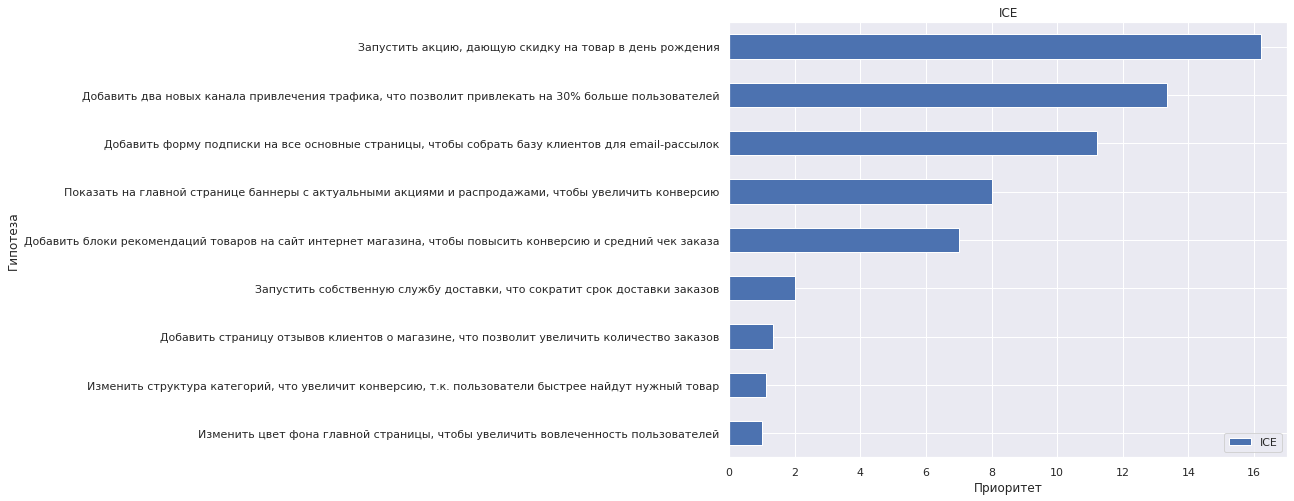

In [8]:
ax = hypothesis[['Hypothesis', 'ICE']].set_index('Hypothesis').sort_values('ICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('ICE')
plt.show()

<a name="rice"></a>
### Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета

[К оглавлению](#table_of_contents)

In [9]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

In [10]:
hypothesis.sort_values('RICE', ascending=False).head()

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,112.00
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,56.00
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,40.00
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,40.00
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,16.20


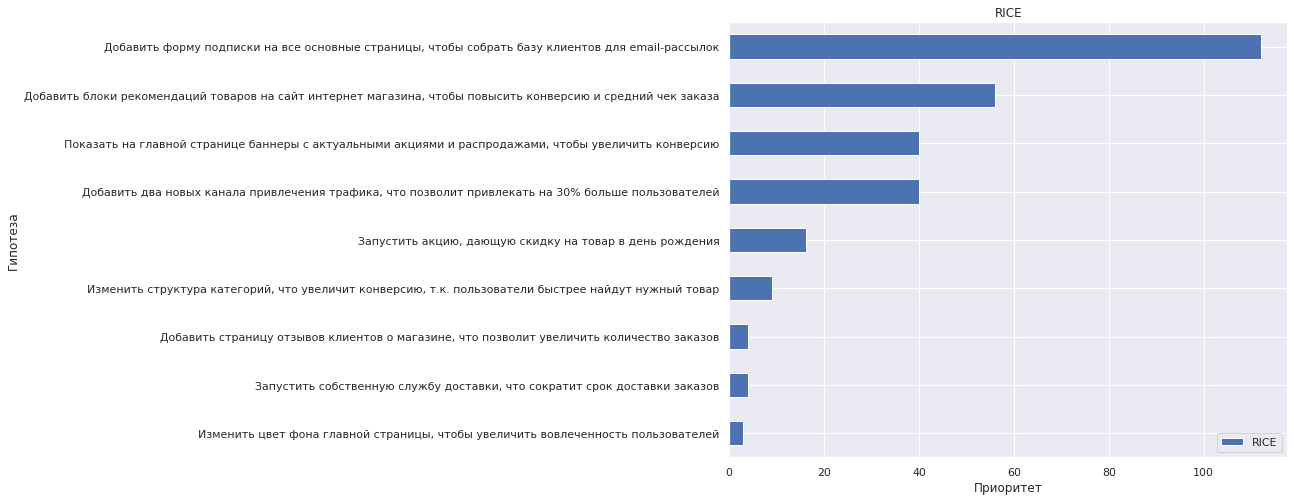

In [11]:
ax = hypothesis[['Hypothesis', 'RICE']].set_index('Hypothesis').sort_values('RICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('RICE')
plt.show()

<a name="why"></a>
### Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло

[К оглавлению](#table_of_contents)

| Нумерация гипотез ICE  | Нумерация гипотез RICE |
|:-:|:-:|
| 8 | 7 |
| 0 | 2 |
| 7 | 0 |
| 6 | 6 |
| 2 | 8 |

Так произошло, потому, что формулы разные, одна учитывает охват, а другая — нет.

<font color='blue'> Отлично, приоритезация гипотеза сделана отлично. </font>

<a name="stage_2"></a>
# Часть 2. Анализ A/B-теста

[К оглавлению](#table_of_contents)

In [12]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [13]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [14]:
orders.rename(columns={'transactionId':'transactionid', 'visitorId':'visitorid'}, inplace=True)

In [15]:
orders_grouped = (orders.groupby(['date','group'], as_index=False)
                        .agg({'transactionid':'nunique','visitorid':'nunique','revenue':'sum'}))\
                        .rename(columns={'transactionid':'orders','visitorid':'buyers'})
orders_grouped['group_copy'] = orders_grouped['group']
orders_grouped = orders_grouped.set_index(['date','group'])
orders_cumsum = orders_grouped.sort_values(['date','group']).groupby('group_copy').cumsum().reset_index()

In [16]:
# посчитаем сумму визитов по дням в каждой группе
visitors_cumsum = visitors.groupby(['date','group'], as_index=False).agg({'visitors':'sum'}).sort_values(['date','group'])
# скопируем group чтобы провести по ней кумулятивную сумму
visitors_cumsum['group_copy'] = visitors_cumsum['group']
visitors_cumsum = visitors_cumsum.set_index(['date','group']).groupby('group_copy').cumsum().reset_index()    

In [17]:
cummulative = orders_cumsum.join(visitors_cumsum[['visitors']])

In [18]:
cummulative['average_check'] = cummulative['revenue'] / cummulative['orders']
cummulative['conversion'] = cummulative['orders'] / cummulative['visitors']

In [19]:
cummulative.head()

,date,group,orders,buyers,revenue,visitors,average_check,conversion
0,2019-08-01,A,24,20,148579,719,"6,190.79",0.03
1,2019-08-01,B,21,20,101217,713,"4,819.86",0.03
2,2019-08-02,A,44,39,242401,1338,"5,509.11",0.03
3,2019-08-02,B,45,43,266748,1294,"5,927.73",0.03
4,2019-08-03,A,68,63,354874,1845,"5,218.74",0.04


<a name="stage_2_1"></a>
### 1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения

[К оглавлению](#table_of_contents)

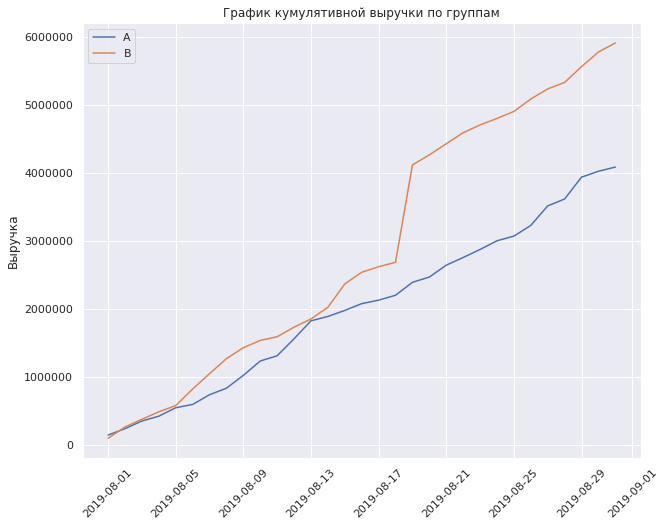

In [20]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'revenue']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'revenue']]
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивной выручки по группам')
plt.ylabel("Выручка")
plt.xticks(rotation=45)
plt.legend()
plt.show()

У B резкий подскок, похожий на выброс. А растет линейно.

<font color='blue'> Верно. </font>

<a name="stage_2_2"></a>
### 2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения
[К оглавлению](#table_of_contents)

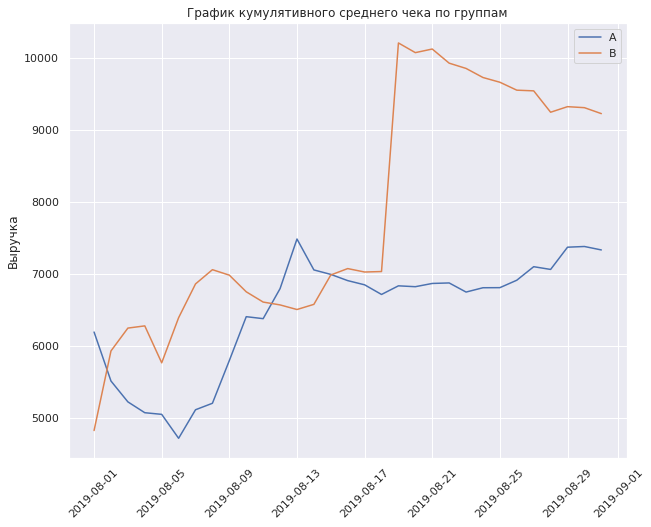

In [21]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'average_check']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'average_check']]
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel("Выручка")
plt.xticks(rotation=45)
plt.legend()
plt.show()

Тоже самое с B, сначала подскакивает, затем делает отскок.

<font color='blue'> Все правильно. </font>

<a name="stage_2_3"></a>
### 3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения

[К оглавлению](#table_of_contents)

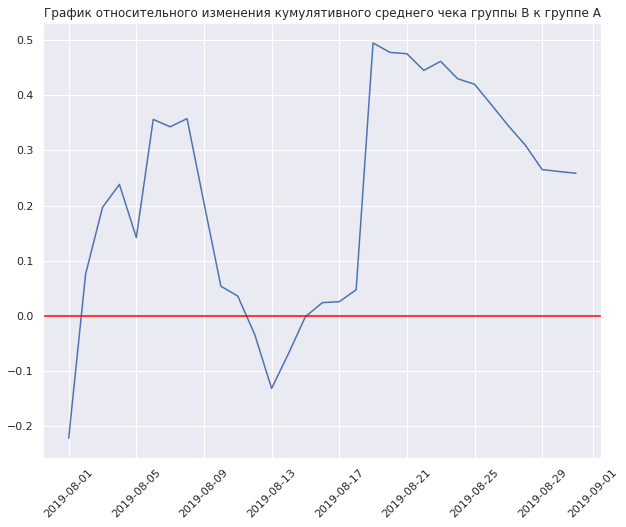

In [22]:
temp = (cummulativeA[['date', 'average_check']].merge(cummulativeB[['date', 'average_check']], 
                                            left_on='date', right_on='date', how='left', suffixes=['_A', '_B']))
plt.plot(temp['date'], temp['average_check_B'] / temp['average_check_A']-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.axhline(y=0, color='red', linestyle='-')
plt.xticks(rotation=45)
plt.show()

<font color='blue'> Ок, стоило отметить, что все три графика демонстрируют одну картину. </font>

<a name="stage_2_4"></a>
### 4. Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения

[К оглавлению](#table_of_contents)

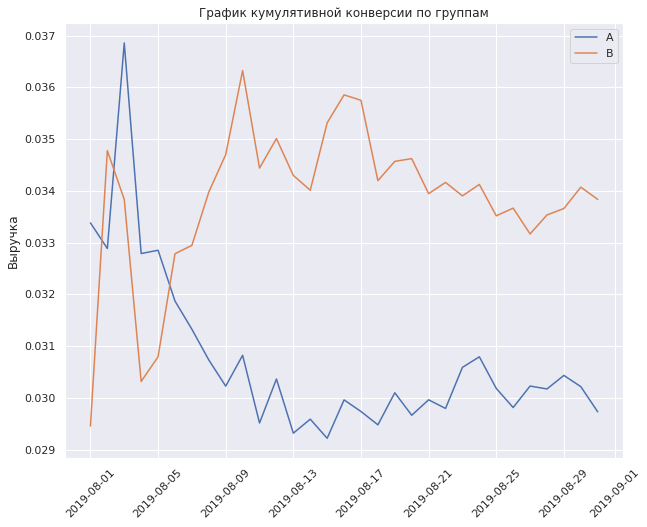

In [23]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'conversion']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'conversion']]
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивной конверсии по группам')
plt.ylabel("Выручка")
plt.xticks(rotation=45)
plt.legend()
plt.show()

После пичка у обоих групп А-конверсия болтается в районе 0,029 и до 0,031. В-конверсия от 0,037 и до 0,033. B-конверсия пока выглядит лучше.

<font color='blue'> все верно. </font>

<a name="stage_2_5"></a>
### 5. Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения

[К оглавлению](#table_of_contents)

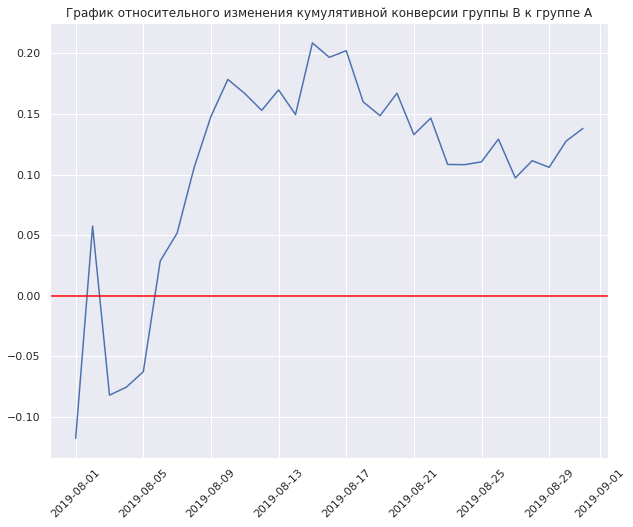

In [24]:
temp = (cummulativeA[['date', 'conversion']].merge(cummulativeB[['date', 'conversion']], 
                                            left_on='date', right_on='date', how='left', suffixes=['_A', '_B']))
plt.plot(temp['date'], temp['conversion_B'] / temp['conversion_A']-1)
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.axhline(y=0, color='red', linestyle='-')
plt.xticks(rotation=45)
plt.show()

B-конверсия прилично лучше, но количество дней теста небольшое.

<font color='blue'> Хорошо. </font>

<a name="stage_2_6"></a>
### 6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения

[К оглавлению](#table_of_contents)

In [25]:
orders_per_user = orders.groupby('visitorid', as_index=False).agg({'transactionid':'nunique'})\
                         .rename(columns={'transactionid':'orders'})

In [26]:
orders_per_user.head()

,visitorid,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


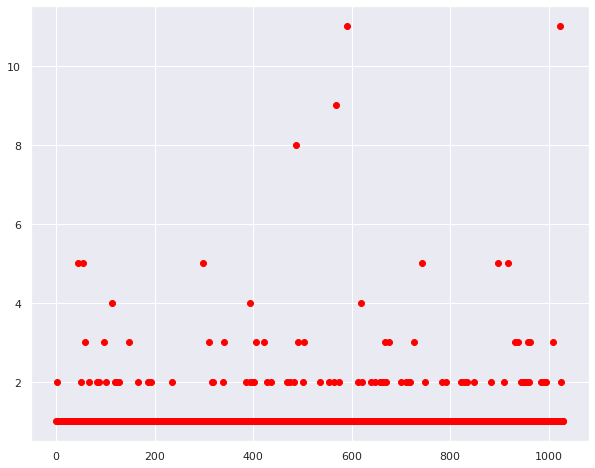

In [27]:
x_values = pd.Series(range(0,len(orders_per_user['orders'])))
plt.scatter(x_values, orders_per_user['orders'], color='red')
plt.show()

Ну в основном покупают 1 раз, но есть и покупатели, которые сидят на интернет-магазинной игле.

<a name="stage_2_7"></a>
### 7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей

[К оглавлению](#table_of_contents)

In [28]:
print('90 перцентиль: %.2f' % (np.percentile(orders_per_user['orders'], [90])))
print('95 перцентиль: %.2f' % (np.percentile(orders_per_user['orders'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(orders_per_user['orders'], [99])))

90 перцентиль: 1.00
95 перцентиль: 2.00
99 перцентиль: 4.00


In [29]:
orders_per_user['orders'].max()

11

In [30]:
np.ptp(orders_per_user['orders'], axis=0)

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


10

In [31]:
outlaws_1p = orders_per_user[orders_per_user['orders'] >= 4]['visitorid'].to_list()

Все, что за 99 перцентилем — аномально.

<a name="stage_2_8"></a>
### 8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения

[К оглавлению](#table_of_contents)

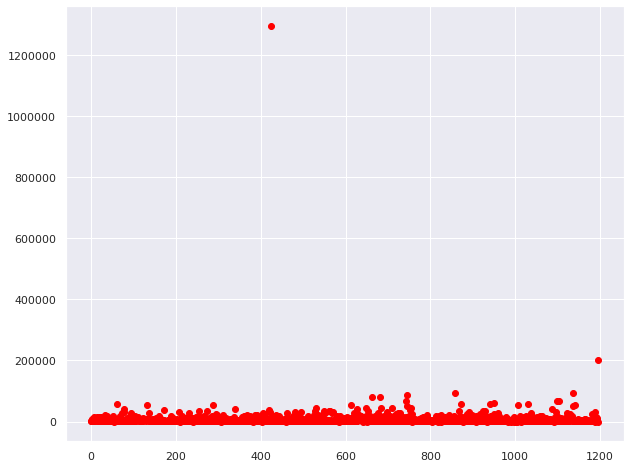

In [32]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], color='red')
plt.show()

Видны 2 отчетливых выброса.

<font color='blue'> Ок, здесь стоило отметить тот выброс, который и вызвал скачки на графиках выше. </font>

<a name="stage_2_9"></a>
### 9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов

[К оглавлению](#table_of_contents)

In [33]:
print('90 перцентиль: %.2f' % (np.percentile(orders['revenue'], [90])))
print('95 перцентиль: %.2f' % (np.percentile(orders['revenue'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(orders['revenue'], [99])))

90 перцентиль: 18168.00
95 перцентиль: 28000.00
99 перцентиль: 58233.20


In [34]:
orders['revenue'].max()

1294500

In [35]:
np.ptp(orders['revenue'], axis=0)

1294450

Все, что за 99 перцентилем — аномально.

<font color='blue'> Хорошо. </font>

<a name="stage_2_10"></a>
### 10. Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения

[К оглавлению](#table_of_contents)

In [36]:
conversion = (orders.groupby('group').agg({'transactionid':'count'}).rename(columns={'transactionid':'orders'}))\
                                     .join((visitors.groupby('group').agg({'visitors':'sum'}))).reset_index()
conversion['conversion'] = conversion['orders'] / conversion['visitors']

In [37]:
conversion

,group,orders,visitors,conversion
0,A,557,18736,0.03
1,B,640,18916,0.03


In [38]:
# Воспользуемся Z-критерием для разности двух долей.
# H0: Конверсия в группе A РАВНА конверсии в группе B
# H1: Конверсия в группе A НЕ РАВНА конверсии в группе B
alpha=0.05
purchases = np.array(conversion['orders'])
leads = np.array(conversion['visitors'])
p1 = purchases[0] / leads[0]
p2 = purchases[1] / leads[1]
combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
difference = p1-p2
z_value = difference / math.sqrt(combined * (1 - combined) * (1 / leads[0] + 1 / leads[1]))
distr = st.norm(0,1)
p_value = (1 - distr.cdf(abs(z_value))) * 2
print('p-значение: ', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.02320723394441848
Отвергаем нулевую гипотезу


In [39]:
conversion['for_fun'] = conversion['conversion'] * 1000
conversion

,group,orders,visitors,conversion,for_fun
0,A,557,18736,0.03,29.73
1,B,640,18916,0.03,33.83


Конверсия B значительно больше, стат.значимость есть.

<a name="stage_2_11"></a>
### 11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения

[К оглавлению](#table_of_contents)

In [40]:
# Воспользуемся критерием Манна-Уитни
# H0: Средний чек A НЕ ПРЕВОСХОДИТ среднему чеку группы B
# H1: Средний чек A ПРЕВОСХОДИТ среднему чеку группы B
alpha = 0.05
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
pvalue = results.pvalue
print('p-значение: ', pvalue)
if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не получилось отвергнуть H0: вывод о различии сделать нельзя")

p-значение:  0.3646454927716229
Не получилось отвергнуть H0: вывод о различии сделать нельзя


In [41]:
orders[orders['group']=='A']['revenue'].mean()

7333.578096947936

In [42]:
orders[orders['group']=='B']['revenue'].mean()

9230.875

<a name="stage_2_12"></a>
### 12. Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения

[К оглавлению](#table_of_contents)

In [43]:
# Зачистим данные
orders_temp = orders[~orders['visitorid'].isin(outlaws_1p)]
conversion_clear = (orders_temp.groupby('group').agg({'transactionid':'count'}).rename(columns={'transactionid':'orders'}))\
                                                .join((visitors.groupby('group').agg({'visitors':'sum'}))).reset_index()

In [44]:
# Воспользуемся Z-критерием для разности двух долей.
# H0: Конверсия в группе A РАВНА конверсии в группе B
# H1: Конверсия в группе A НЕ РАВНА конверсии в группе B
alpha=0.05
purchases = np.array(conversion_clear['orders'])
leads = np.array(conversion_clear['visitors'])
p1 = purchases[0] / leads[0]
p2 = purchases[1] / leads[1]
combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
difference = p1-p2
z_value = difference / math.sqrt(combined * (1 - combined) * (1 / leads[0] + 1 / leads[1]))
distr = st.norm(0,1)
p_value = (1 - distr.cdf(abs(z_value))) * 2
print('p-значение: ', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.019821291468021807
Отвергаем нулевую гипотезу


B-конверсия снова превышает конверсию А со стат.значимостью.

<a name="stage_2_13"></a>
### 13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения

[К оглавлению](#table_of_contents)

In [45]:
orders_clear = orders.query('revenue <= 58233')

In [46]:
# Воспользуемся критерием Манна-Уитни
# H0: Средний чек A НЕ ПРЕВОСХОДИТ среднему чеку группы B
# H1: Средний чек A ПРЕВОСХОДИТ среднему чеку группы B
alpha = 0.05
results = st.mannwhitneyu(orders_clear[orders_clear['group']=='A']['revenue'], orders_clear[orders_clear['group']=='B']['revenue'])
pvalue = results.pvalue
print('p-значение: ', pvalue)
if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не получилось отвергнуть H0: вывод о различии сделать нельзя")

p-значение:  0.31043134834237274
Не получилось отвергнуть H0: вывод о различии сделать нельзя


In [47]:
orders_clear[orders_clear['group']=='A']['revenue'].mean()

6470.587272727273

In [48]:
orders_clear[orders_clear['group']=='B']['revenue'].mean()

6592.692913385827

Чуда не произошло, хотя чек прилично изменился.

<font color='blue'> Хорошо, гипотезы проверены верно. </font>

<a name="stage_2_14"></a>
### 14. Примите решение по результатам теста и объясните его

[К оглавлению](#table_of_contents)

Продолжаем тест, пока графики не встанут на плато и мы соберем больше наблюдений, ну или не закончится бюджет.
Но шансы победить у B есть.

<font color='blue'> Проект выполнен отлично, молодец. </font>